# Importing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import keras
import tensorflow as tf
print(f"Keras version: {keras.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Keras version: 3.9.2
TensorFlow version: 2.19.0


# Data prep

In [3]:
path = r'C:\Users\Administrator\Desktop\Projects (Carrer foundry)\Achievement 2.5\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [4]:
# This will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [5]:
# This is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

# Run model

In [6]:
# How many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 8,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/8


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - accuracy: 0.5122 - loss: 0.1371 - val_accuracy: 0.7824 - val_loss: 0.1035
Epoch 2/8
 1/75 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.8333 - loss: 0.1193

C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8333 - loss: 0.1193 - val_accuracy: 0.8009 - val_loss: 0.1019
Epoch 3/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.7231 - loss: 0.0908 - val_accuracy: 0.7500 - val_loss: 0.0995
Epoch 4/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7500 - loss: 0.1029 - val_accuracy: 0.7500 - val_loss: 0.0995
Epoch 5/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.7814 - loss: 0.0814 - val_accuracy: 0.7361 - val_loss: 0.0910
Epoch 6/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9167 - loss: 0.0646 - val_accuracy: 0.7500 - val_loss: 0.0848
Epoch 7/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.7659 - loss: 0.0810 - val_accuracy: 0.7222 - val_loss: 0.0986
Epoch 8/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5000 - loss: 0.1659 - val_accuracy: 0.6852 - val_loss: 0.1065


In [7]:
# the loss is good but maybe we can get better accuracy with more epochs

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 16,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.7819 - loss: 0.0786 - val_accuracy: 0.6620 - val_loss: 0.1488
Epoch 2/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7500 - loss: 0.1201 - val_accuracy: 0.6250 - val_loss: 0.1738
Epoch 3/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.6891 - loss: 0.1295 - val_accuracy: 0.6898 - val_loss: 0.1122
Epoch 4/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9167 - loss: 0.0474 - val_accuracy: 0.6806 - val_loss: 0.1216
Epoch 5/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.7956 - loss: 0.0778 - val_accuracy: 0.6944 - val_loss: 0.1221
Epoch 6/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.6944 - val_loss: 0.1227
Epoch 7/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.8415 - loss: 0.0631 - val_accuracy: 0.8333 - val_loss: 0.0573
Epoch 8/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8333 - loss: 0.0358 - val_accuracy: 0.

In [8]:
# Finally lets try 30 epochs

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 30,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.8185 - loss: 0.0732 - val_accuracy: 0.7917 - val_loss: 0.0847
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9167 - loss: 0.0218 - val_accuracy: 0.8194 - val_loss: 0.0792
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.8889 - loss: 0.0459 - val_accuracy: 0.8194 - val_loss: 0.0673
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6667 - loss: 0.0881 - val_accuracy: 0.7963 - val_loss: 0.0688
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.8132 - loss: 0.0589 - val_accuracy: 0.6852 - val_loss: 0.1229
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9167 - loss: 0.0571 - val_accuracy: 0.6620 - val_loss: 0.1294
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.8706 - loss: 0.0492 - val_accuracy: 0.8704 - val_loss: 0.0508
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8333 - loss: 0.0514 - val_accuracy: 0.8

In [9]:
results = pd.DataFrame(model.history.history)

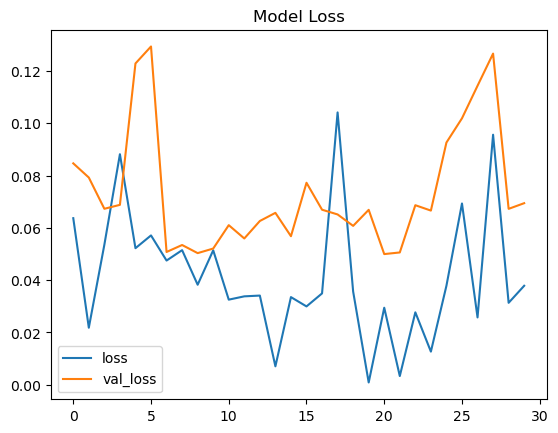

In [10]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

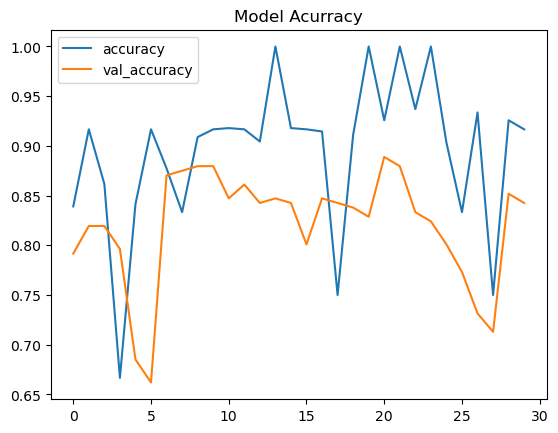

In [11]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [12]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9166666865348816, Val_Accuracy: 0.8425925970077515
Loss: 0.03782571107149124, Val_Loss: 0.06942066550254822


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


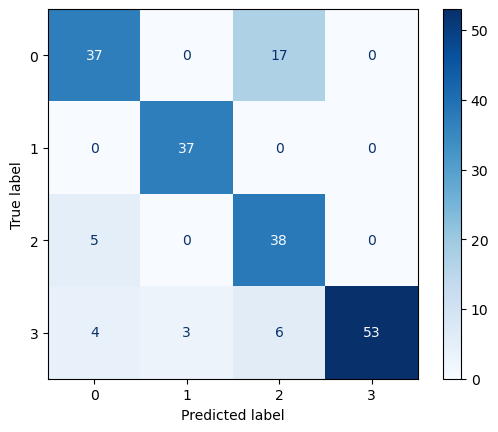

In [17]:
# Collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()